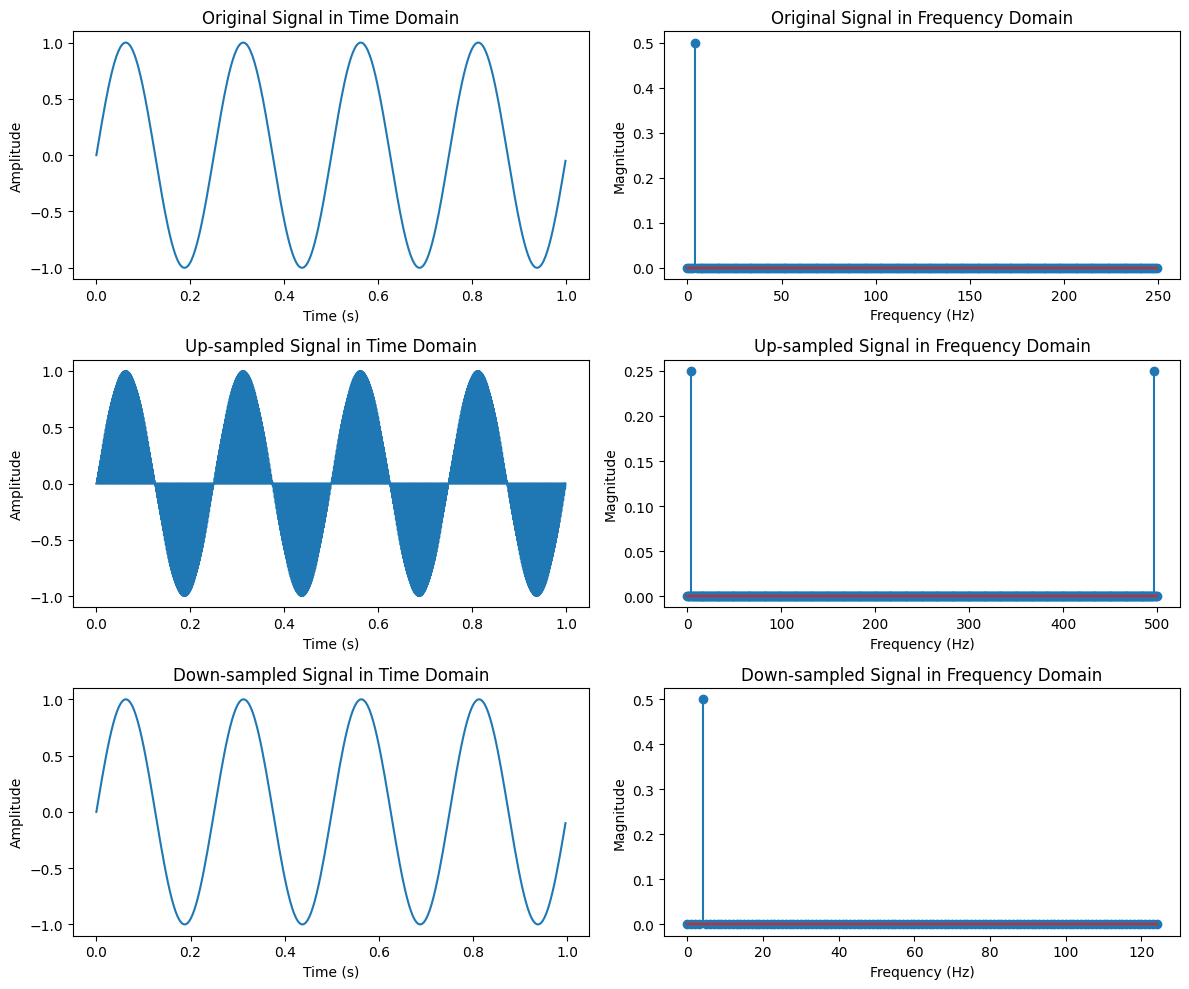

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Step 1: Generate a sine signal
f_analog = 4  # Analog frequency in Hz
f_sampling = 500  # Sampling frequency in Hz
t = np.arange(0, 1, 1/f_sampling)  # Time vector for 1 second
signal = np.sin(2 * np.pi * f_analog * t)  # Sine wave

# Step 2: Observe signal in the frequency domain
N = len(signal)
frequencies = fftfreq(N, 1/f_sampling)  # Frequency bins
fft_values = fft(signal)  # Perform FFT

# Step 3: Up-sample the signal by a factor of 2
signal_up = np.zeros(2 * len(signal))
signal_up[::2] = signal

# Step 4: Down-sample the signal by a factor of 2
signal_down = signal[::2]

# Step 5: Frequency domain of up-sampled and down-sampled signals
N_up = len(signal_up)
frequencies_up = fftfreq(N_up, 1/(2*f_sampling))
fft_values_up = fft(signal_up)

N_down = len(signal_down)
frequencies_down = fftfreq(N_down, 1/(f_sampling/2))
fft_values_down = fft(signal_down)

# Plotting the results
plt.figure(figsize=(12, 10))

# Original signal in time domain
plt.subplot(3, 2, 1)
plt.plot(t, signal)
plt.title("Original Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Original signal in frequency domain
plt.subplot(3, 2, 2)
plt.stem(frequencies[:N//2], np.abs(fft_values[:N//2]) / N)
plt.title("Original Signal in Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Up-sampled signal in time domain
plt.subplot(3, 2, 3)
plt.plot(np.arange(0, 1, 1/(2*f_sampling)), signal_up)
plt.title("Up-sampled Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Up-sampled signal in frequency domain
plt.subplot(3, 2, 4)
plt.stem(frequencies_up[:N_up//2], np.abs(fft_values_up[:N_up//2]) / N_up)
plt.title("Up-sampled Signal in Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Down-sampled signal in time domain
plt.subplot(3, 2, 5)
plt.plot(np.arange(0, 1, 2/f_sampling), signal_down)
plt.title("Down-sampled Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Down-sampled signal in frequency domain
plt.subplot(3, 2, 6)
plt.stem(frequencies_down[:N_down//2], np.abs(fft_values_down[:N_down//2]) / N_down)
plt.title("Down-sampled Signal in Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()
